<a href="https://colab.research.google.com/github/ampnb/Mind/blob/main/MW_nonlinearV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [2]:
!gdown --id 1uLZeesfmwsLn_XWKA9i1Vi1TFz3VJaRY

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1uLZeesfmwsLn_XWKA9i1Vi1TFz3VJaRY
From (redirected): https://drive.google.com/uc?id=1uLZeesfmwsLn_XWKA9i1Vi1TFz3VJaRY&confirm=t&uuid=4663ef7e-a825-4cf8-96e7-de5b6cf3b2c0
To: /content/rawdata_mw.zip
100% 2.74G/2.74G [00:46<00:00, 58.6MB/s]


In [3]:
!unzip '/content/rawdata_mw.zip'

Archive:  /content/rawdata_mw.zip
   creating: rawdata_mw/
  inflating: __MACOSX/._rawdata_mw   
  inflating: rawdata_mw/.DS_Store    
  inflating: __MACOSX/rawdata_mw/._.DS_Store  
   creating: rawdata_mw/EOG/
   creating: rawdata_mw/EEG/
  inflating: rawdata_mw/EOG/MW_P21.txt  
  inflating: rawdata_mw/EOG/MW_P20.txt  
  inflating: rawdata_mw/EOG/MW_P22.txt  
  inflating: rawdata_mw/EOG/MW_P23.txt  
  inflating: rawdata_mw/EOG/MW_P8.txt  
  inflating: rawdata_mw/EOG/MW_P9.txt  
  inflating: rawdata_mw/EOG/MW_P18.txt  
  inflating: rawdata_mw/EOG/MW_P24.txt  
  inflating: rawdata_mw/EOG/MW_P25.txt  
  inflating: rawdata_mw/EOG/MW_P19.txt  
  inflating: rawdata_mw/EOG/MW_P14.txt  
  inflating: rawdata_mw/EOG/MW_P7.txt  
  inflating: rawdata_mw/EOG/MW_P6.txt  
  inflating: rawdata_mw/EOG/MW_P15.txt  
  inflating: rawdata_mw/EOG/MW_P17.txt  
  inflating: rawdata_mw/EOG/MW_P4.txt  
  inflating: rawdata_mw/EOG/MW_P5.txt  
  inflating: rawdata_mw/EOG/MW_P16.txt  
  inflating: rawdata_mw/EOG/

In [4]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 8.4 MB/s eta 0:00:00


In [5]:
import torch
import torchvision

In [6]:
torch.__version__

'2.0.1+cu118'

In [7]:
torchvision.__version__

'0.15.2+cu118'

In [8]:
import os
import mne
from mne.preprocessing import ICA
from mne.filter import filter_data
import numpy as np

In [9]:
eeg_folder = "/content/rawdata_mw/EEG"
eog_folder = "/content/rawdata_mw/EOG"

eeg_files = sorted(['P_{}_MW.txt'.format(i) for i in range(1,26)])
eog_files = sorted(['MW_P{}.txt'.format(i) for i in range(1,26)])

In [10]:
eeg_file_path = os.path.join(eeg_folder, eeg_files[0])
# data_eeg = np.loadtxt(eeg_file_path, skiprows=1)

In [11]:
with open(eeg_file_path, 'r') as f:
    for _ in range(5):
        print(f.readline())

FP1 FP2 F7 F3 Fz F4 F8 T3 C3 Cz C4 T4 T5 P3 PZ P4 T6 O1 O2 A1 A2 Events

-195.629 -140.437 19.368 62.651 76.628 12.876 -59.621 4.952 -13.424 44.44 45.356 45.965 34.132 -11.684 56.51 23.254 -18.705 -16.795 40.209 44.599 -54.646 ""

-13139.391 -9434.704 1301.088 4208.712 5147.125 865.091 -4004.706 332.715 -901.727 2985.328 3046.753 3087.755 2292.167 -785.295 3795.284 1561.499 -1256.107 -1128.989 2701.438 2995.595 -3669.8 ""

-33821.586 -24289.828 3351.177 10833.558 13248.941 2225.9 -10308.564 856.852 -2321.132 7685.312 7843.169 7948.046 5899.352 -2021.861 9769.472 4018.75 -3233.976 -2906.567 6956.786 7709.643 -9443.897 ""

-40072.063 -28780.656 3975.481 12835.61 15696.151 2636.491 -12213.483 1014.098 -2750.587 9104.404 9292.813 9413.622 6989.625 -2394.466 11574.927 4762.342 -3831.981 -3444.619 8241.948 9136.525 -11186.834 ""



In [12]:
import pandas as pd

data_eeg = pd.read_csv(eeg_file_path, sep='\s+', index_col=False)
print(data_eeg.head())

<ipython-input-12-3bf096c4b51d>:3: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data_eeg = pd.read_csv(eeg_file_path, sep='\s+', index_col=False)


         FP1        FP2        F7         F3         Fz        F4         F8  \
0   -195.629   -140.437    19.368     62.651     76.628    12.876    -59.621   
1 -13139.391  -9434.704  1301.088   4208.712   5147.125   865.091  -4004.706   
2 -33821.586 -24289.828  3351.177  10833.558  13248.941  2225.900 -10308.564   
3 -40072.063 -28780.656  3975.481  12835.610  15696.151  2636.491 -12213.483   
4 -37851.566 -27185.436  3762.739  12123.968  14824.421  2490.551 -11541.963   

         T3        C3        Cz  ...        T5        P3         PZ        P4  \
0     4.952   -13.424    44.440  ...    34.132   -11.684     56.510    23.254   
1   332.715  -901.727  2985.328  ...  2292.167  -785.295   3795.284  1561.499   
2   856.852 -2321.132  7685.312  ...  5899.352 -2021.861   9769.472  4018.750   
3  1014.098 -2750.587  9104.404  ...  6989.625 -2394.466  11574.927  4762.342   
4   956.361 -2597.353  8597.848  ...  6604.280 -2260.853  10933.549  4500.331   

         T6        O1        O2 

In [13]:
data_eeg_array = data_eeg.to_numpy()
print(data_eeg_array.shape)

(1056258, 22)


In [14]:
print("EEG data shape: ", data_eeg.shape)

EEG data shape:  (1056258, 22)


In [123]:
# # Load the first EOG data
# eog_file_path = os.path.join(eog_folder, eog_files[0])
# data_eog = pd.read_csv(eog_file_path, sep='\s+', index_col=False)
# print(data_eog.head())

In [30]:
# data_eog = pd.read_csv(eog_file_path, sep='\s+', skiprows=5, index_col=False)
# print(data_eog.head())


In [31]:
# with open(eog_file_path, 'r') as file:
#     for i in range(50):  # adjust range as needed
#         print(file.readline())


In [122]:
# import os
# import pandas as pd

# eog_folder = "/content/rawdata_mw/EOG"
# eog_files = sorted(['MW_P{}.txt'.format(i) for i in range(1,26)])

# # Create an empty DataFrame
# all_data = pd.DataFrame()

# for file_name in eog_files:
#     # Generate the full path to the file
#     eog_file_path = os.path.join(eog_folder, file_name)

#     # Open the file and read the lines
#     with open(eog_file_path, 'r') as file:
#         lines = file.readlines()

#     # Find the line where the actual data starts
#     start_line = next(i for i, line in enumerate(lines) if 'TIME' in line)

#     # Now read the file starting from the start_line
#     data_eog = pd.read_csv(eog_file_path, sep='\s+', skiprows=start_line, index_col=False, error_bad_lines=False)
#     all_data = pd.concat([all_data, data_eog])

# print(all_data.head())



In [19]:
print('Total number of rows in the DataFrame:', len(data_eog))



Total number of rows in the DataFrame: 4917080


In [32]:
# print(data_eog.tail())

In [33]:
# data_eog.describe()

In [34]:
# data_eog.isnull().sum()

In [23]:
data_eeg

,FP1,FP2,F7,F3,Fz,F4,F8,T3,C3,Cz,...,T5,P3,PZ,P4,T6,O1,O2,A1,A2,Events
0,-195.629,-140.437,19.368,62.651,76.628,12.876,-59.621,4.952,-13.424,44.440,...,34.132,-11.684,56.510,23.254,-18.705,-16.795,40.209,44.599,-54.646,NaN
1,-13139.391,-9434.704,1301.088,4208.712,5147.125,865.091,-4004.706,332.715,-901.727,2985.328,...,2292.167,-785.295,3795.284,1561.499,-1256.107,-1128.989,2701.438,2995.595,-3669.800,NaN
2,-33821.586,-24289.828,3351.177,10833.558,13248.941,2225.900,-10308.564,856.852,-2321.132,7685.312,...,5899.352,-2021.861,9769.472,4018.750,-3233.976,-2906.567,6956.786,7709.643,-9443.897,NaN
3,-40072.063,-28780.656,3975.481,12835.610,15696.151,2636.491,-12213.483,1014.098,-2750.587,9104.404,...,6989.625,-2394.466,11574.927,4762.342,-3831.981,-3444.619,8241.948,9136.525,-11186.834,NaN
4,-37851.566,-27185.436,3762.739,12123.968,14824.421,2490.551,-11541.963,956.361,-2597.353,8597.848,...,6604.280,-2260.853,10933.549,4500.331,-3618.336,-3254.212,7783.964,8630.978,-10565.169,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056253,-24257.402,-15711.367,-6872.441,-7508.980,16077.614,3617.688,-12724.595,-585.600,-2308.079,8566.298,...,6353.941,-2022.263,13116.469,3965.689,-526.629,-3131.561,8804.324,11208.479,-11829.785,NaN
1056254,-24258.000,-15713.245,-6874.428,-7511.834,16077.143,3616.852,-12722.754,-601.591,-2310.852,8565.450,...,6356.510,-2022.225,13117.900,3969.347,-520.101,-3125.696,8808.660,11203.480,-11825.503,NaN
1056255,-24260.191,-15714.948,-6871.288,-7510.336,16076.353,3617.067,-12718.969,-597.477,-2307.135,8568.258,...,6363.511,-2020.297,13116.684,3970.280,-528.302,-3125.138,8803.293,11203.488,-11835.520,NaN
1056256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# data_eog

In [36]:
# data_eeg.head(5)

In [37]:
# data_eog.tail(5)

In [27]:
data_eeg.to_csv('eeg_data.csv')

In [28]:
#data_eog.to_excel('eog_data.xlsx')

In [38]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import matplotlib.pyplot as plt


In [42]:
import pandas as pd

df = pd.read_csv('/content/eeg_data.csv')

# Check 'Light Trigger' because i can't calculate properly
for col in df.columns:
    if any(df[col] == 'Light Trigger'):
        print(f"'Light Trigger' found in column {col}")


<ipython-input-42-3eabd759081d>:4: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/eeg_data.csv')


'Light Trigger' found in column Events


In [43]:
unique_events = df['Events'].unique()
for event in unique_events:
    print(event)

nan
Light Trigger
TTL Trigger: 1
RS232 Trigger: 1('')
RS232 Trigger: 101('e')
RS232 Trigger: 7('')
RS232 Trigger: 5('')
RS232 Trigger: 100('d')
RS232 Trigger: 4('')
RS232 Trigger: 6('')
RS232 Trigger: 102('f')


In [77]:
# Exclude the 'Events' column from the data used to create the Raw object
data = df.drop(columns='Events').values.T  # Transpose the array
ch_names = list(df.drop(columns='Events').columns)

# Add the 'STI' channel to the data and channel names
sti = np.zeros((1, data.shape[1]))  # New 'STI' channel (all zeros for now)
data = np.vstack((data, sti))
ch_names.append('STI')

ch_types = ['eeg'] * len(ch_names)
ch_types[-1] = 'stim'  # The last channel type is 'stim', not 'eeg'
info = mne.create_info(ch_names=ch_names, sfreq=512, ch_types=ch_types)
raw = mne.io.RawArray(data, info)

# Create a dictionary mapping trigger descriptions to their codes
trigger_codes = {
    'Light Trigger': 0,
    'TTL Trigger: 1': 100,  # represent the 'Bell sound'
    'RS232 Trigger: 101(\'e\')': 101,  # 'Breath focus answer'
    'RS232 Trigger: 102(\'f\')': 102,  # 'Mind wandering answer'
    'RS232 Trigger: 1(\'\')': 1,  # Placeholder value, replace with correct code
    'RS232 Trigger: 7(\'\')': 7,  # Placeholder value, replace with correct code
    'RS232 Trigger: 5(\'\')': 5,  # Placeholder value, replace with correct code
    'RS232 Trigger: 100(\'d\')': 4,  # Placeholder value, replace with correct code
    'RS232 Trigger: 4(\'\')': 6,  # Placeholder value, replace with correct code
    'RS232 Trigger: 6(\'\')': 3,  # Placeholder value, replace with correct code

}

# Convert the trigger descriptions in the DataFrame to their codes
df['Events'] = df['Events'].replace(trigger_codes)
trigger_values = df['Events'][df['Events'].notna()].values.astype(int)

# Then create the events array as before
events = np.zeros((len(trigger_times), 3), dtype=int)
events[:, 0] = trigger_times
events[:, 2] = trigger_values

# Then create the event_id dictionary
event_id = {v: k for k, v in trigger_codes.items()}  # this reverses the keys and values in trigger_codes

# Now add the events to the 'STI' channel
raw.add_events(events, stim_channel='STI')

Creating RawArray with float64 data, n_channels=23, n_times=1056258
    Range : 0 ... 1056257 =      0.000 ...  2063.002 secs
Ready.


# Preprocessing

In [78]:
raw.filter(1, 40)  # Apply a bandpass filter from 1 to 40 Hz


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.9s finished


<RawArray | 23 x 1056258 (2063.0 s), ~185.4 MB, data loaded>

In [79]:
# # Then create the event_id dictionary
# event_id = {str(k): v for k, v in trigger_codes.items()}  # this reverses the keys and values in trigger_codes

# # Now create the epochs
# epochs = mne.Epochs(raw, events, event_id)


In [80]:
print(df['Events'].unique())


[ nan   0. 100. 101.   2.   3.   4.   5.   6. 102.]


In [81]:
# print(event_id)
# print(events)

In [82]:
# del event_id["RS232 Trigger: 1('')"]


KeyError: ignored

In [83]:
event_id["TTL Trigger: 1"] = 100


In [84]:
# Print all unique event codes in the 'events' array
unique_events_in_array = np.unique(events[:, 2])
print(f"Unique event codes in 'events' array: {unique_events_in_array}")

# Print all event codes in the 'event_id' dictionary
event_codes_in_dict = np.array(list(event_id.values()))
print(f"Event codes in 'event_id' dictionary: {event_codes_in_dict}")

# Check if all event codes in 'event_id' dictionary are in 'events' array
print(f"All event codes in dictionary are in array: {np.all(np.isin(event_codes_in_dict, unique_events_in_array))}")


Unique event codes in 'events' array: [  0   2   3   4   5   6 100 101 102]
Event codes in 'event_id' dictionary: ['Light Trigger' 'TTL Trigger: 1' "RS232 Trigger: 101('e')"
 "RS232 Trigger: 102('f')" "RS232 Trigger: 1('\x01')"
 "RS232 Trigger: 7('\x07')" "RS232 Trigger: 5('\x05')"
 "RS232 Trigger: 100('d')" "RS232 Trigger: 4('\x04')"
 "RS232 Trigger: 6('\x06')" '100']
All event codes in dictionary are in array: False


/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [85]:
import mne

In [86]:
event_id.pop("RS232 Trigger: 1('\\x01')", None)
event_id.pop("RS232 Trigger: 7('\\x07')", None)


In [87]:
# event_id.pop("RS232 Trigger: 7('\\x07')", None)


In [90]:
# Define event codes and labels
new_event_id = {
    "RS232 Trigger: 0('\\x00')": 0,
    "RS232 Trigger: 2('\\x02')": 2,
    "RS232 Trigger: 3('\\x03')": 3,
    "RS232 Trigger: 4('\\x04')": 4,
    "RS232 Trigger: 5('\\x05')": 5,
    "RS232 Trigger: 6('\\x06')": 6,
    "RS232 Trigger: 100('d')": 100,
    "RS232 Trigger: 101('e')": 101,
    "RS232 Trigger: 102('f')": 102,
}

epochs = mne.Epochs(raw, events, new_event_id, tmin=-0.2, tmax=0.5)




Not setting metadata
166 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


In [102]:
import numpy as np

# check if there are NaNs in the data
print("Number of NaNs in the data: ", np.isnan(evoked.data).sum())


Number of NaNs in the data:  0


In [103]:
evoked.data = np.nan_to_num(evoked.data)


Are there still NaN values in evoked.data?  False


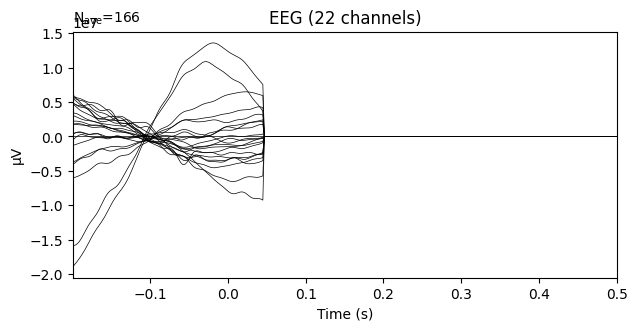

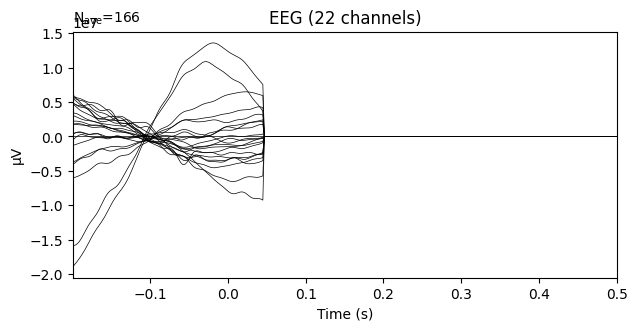

In [104]:
print("Are there still NaN values in evoked.data? ", np.isnan(evoked.data).any())
evoked.plot()




In [109]:
print(epochs.event_id)


{"RS232 Trigger: 0('\\x00')": 0, "RS232 Trigger: 2('\\x02')": 2, "RS232 Trigger: 3('\\x03')": 3, "RS232 Trigger: 4('\\x04')": 4, "RS232 Trigger: 5('\\x05')": 5, "RS232 Trigger: 6('\\x06')": 6, "RS232 Trigger: 100('d')": 100, "RS232 Trigger: 101('e')": 101, "RS232 Trigger: 102('f')": 102}


# Compare Conditions

In [114]:
# # Average epochs for the two conditions
# evoked_condition_1 = epochs['RS232 Trigger: 100(\'d\')'].average()
# evoked_condition_2 = epochs['RS232 Trigger: 101(\'e\')'].average()

# # Plot the two conditions
# mne.viz.plot_compare_evokeds([evoked_condition_1, evoked_condition_2], picks='eeg')


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
combining channels using "gfp"
combining channels using "gfp"


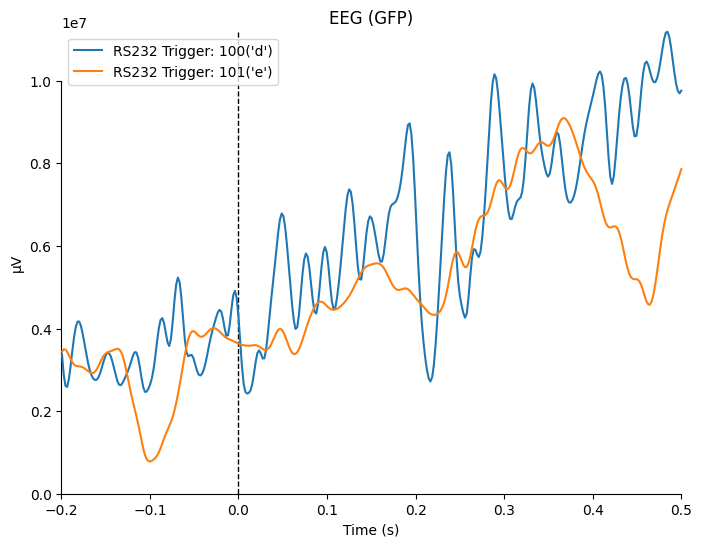

combining channels using "gfp"
combining channels using "gfp"


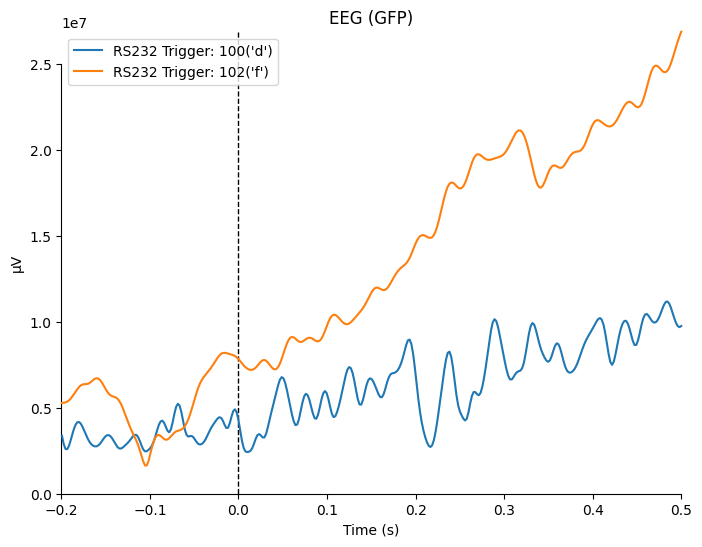

combining channels using "gfp"
combining channels using "gfp"


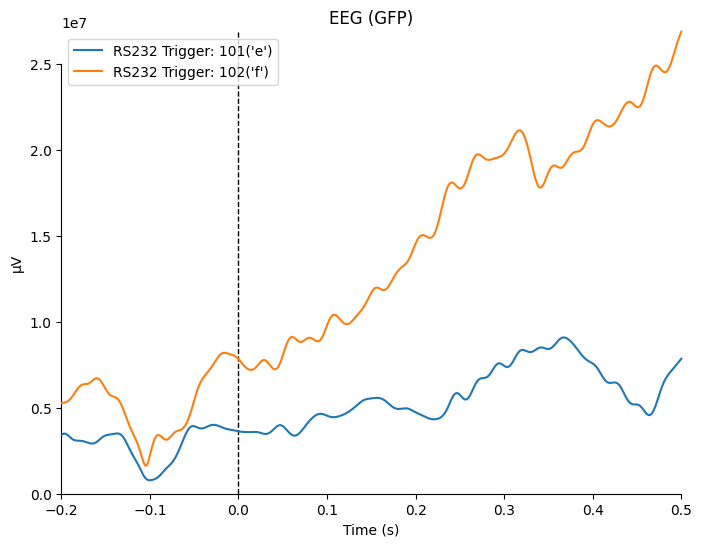

[<Figure size 800x600 with 1 Axes>]

In [118]:
evoked_bell = epochs['RS232 Trigger: 100(\'d\')'].average()  # Bell sound, represented as 'd' (ASCII for 100)
evoked_breath_focus = epochs['RS232 Trigger: 101(\'e\')'].average()  # Breath focus, represented as 'e' (ASCII for 101)
evoked_mind_wandering = epochs['RS232 Trigger: 102(\'f\')'].average()  # Mind wandering, represented as 'f' (ASCII for 102)


# Comparing bell sound and breath focus responses
mne.viz.plot_compare_evokeds([evoked_bell, evoked_breath_focus], picks='eeg')

# Comparing bell sound and mind wandering responses
mne.viz.plot_compare_evokeds([evoked_bell, evoked_mind_wandering], picks='eeg')

# 2. Breath focus vs. Mind wandering

# Comparing breath focus and mind wandering responses
mne.viz.plot_compare_evokeds([evoked_breath_focus, evoked_mind_wandering], picks='eeg')

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


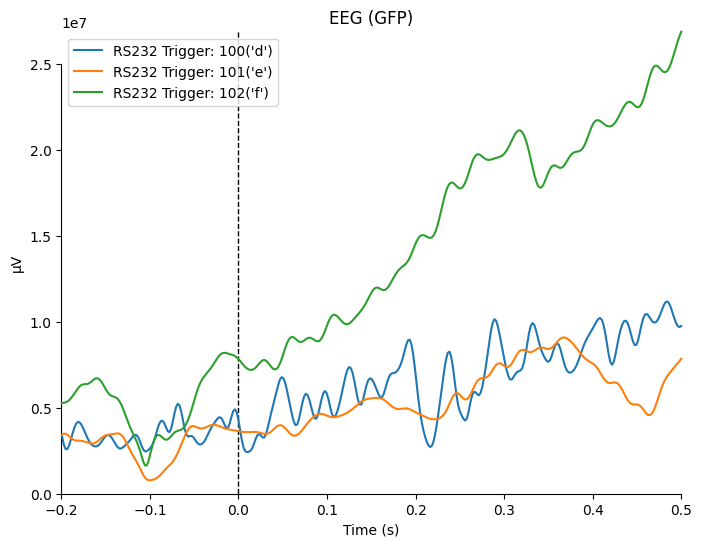

[<Figure size 800x600 with 1 Axes>]

In [119]:
# Comparing bell sound, breath focus, and mind wandering responses
mne.viz.plot_compare_evokeds([evoked_bell, evoked_breath_focus, evoked_mind_wandering], picks='eeg')

In [121]:
import numpy as np
import scipy.stats as stats
from mne.stats import bonferroni_correction

# Define the conditions to be compared
condition1 = epochs['RS232 Trigger: 100(\'d\')'].get_data()  # Bell sound, represented as 'd' (ASCII for 100)
condition2 = epochs['RS232 Trigger: 101(\'e\')'].get_data()  # Breath focus, represented as 'e' (ASCII for 101)
condition3 = epochs['RS232 Trigger: 102(\'f\')'].get_data()  # Mind wandering, represented as 'f' (ASCII for 102)

# Run a separate t-test for each electrode and time point
t_vals, p_vals = stats.ttest_ind(condition1, condition2, axis=0)

# Correct for multiple comparisons
reject_h0, corrected_p_vals = bonferroni_correction(p_vals)

# Print the results
significant_timepoints = np.where(reject_h0)
print('Significant timepoints:', significant_timepoints)

Using data from preloaded Raw for 1 events and 359 original time points ...
Using data from preloaded Raw for 30 events and 359 original time points ...
Using data from preloaded Raw for 11 events and 359 original time points ...
Significant timepoints: (array([], dtype=int64), array([], dtype=int64))


<ipython-input-121-212b2dac38df>:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_vals, p_vals = stats.ttest_ind(condition1, condition2, axis=0)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


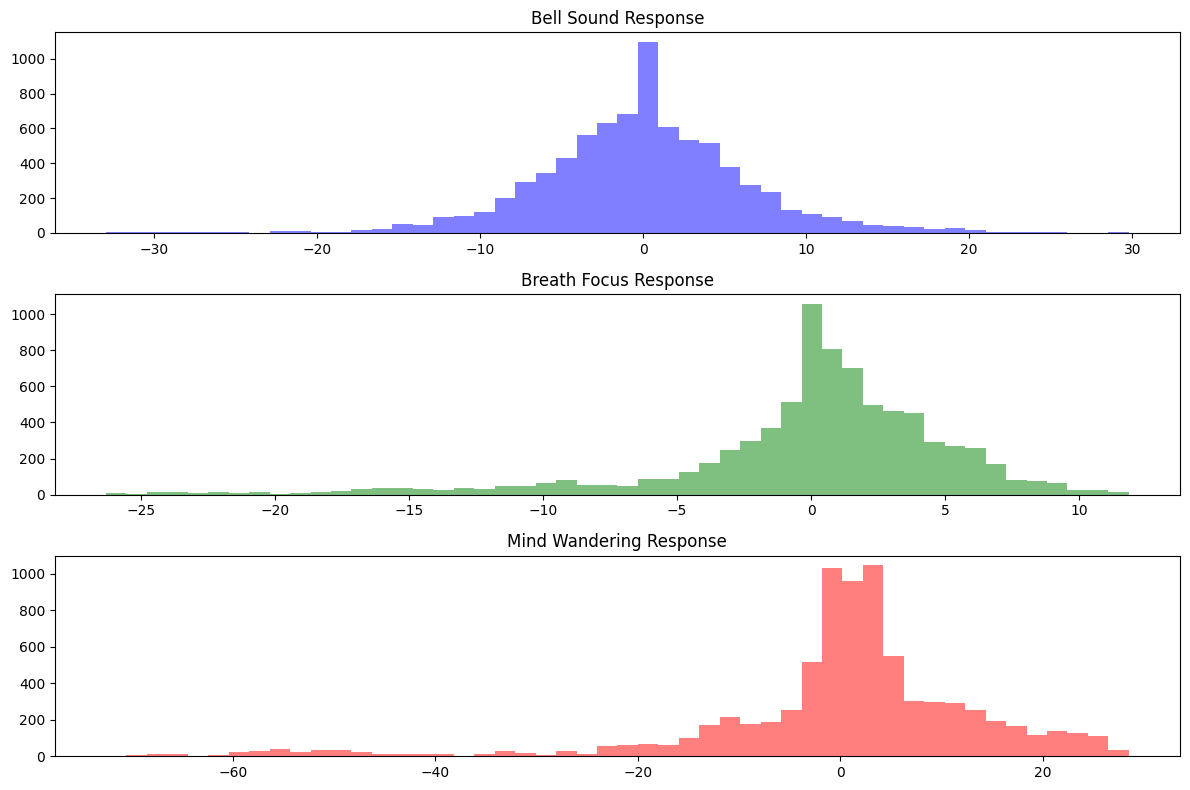

In [124]:
import matplotlib.pyplot as plt

# Flatten your data to 1D for visualization
data_bell_flat = evoked_bell.data.flatten()
data_breath_focus_flat = evoked_breath_focus.data.flatten()
data_mind_wandering_flat = evoked_mind_wandering.data.flatten()

# Plot histograms
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.hist(data_bell_flat, bins=50, color='blue', alpha=0.5)
plt.title('Bell Sound Response')

plt.subplot(3, 1, 2)
plt.hist(data_breath_focus_flat, bins=50, color='green', alpha=0.5)
plt.title('Breath Focus Response')

plt.subplot(3, 1, 3)
plt.hist(data_mind_wandering_flat, bins=50, color='red', alpha=0.5)
plt.title('Mind Wandering Response')

plt.tight_layout()
plt.show()



In [125]:
import numpy as np

# Check for NaN values
nan_bell = np.isnan(evoked_bell.data).any()
nan_breath_focus = np.isnan(evoked_breath_focus.data).any()
nan_mind_wandering = np.isnan(evoked_mind_wandering.data).any()

print(f"Bell Sound Response contains NaN: {nan_bell}")
print(f"Breath Focus Response contains NaN: {nan_breath_focus}")
print(f"Mind Wandering Response contains NaN: {nan_mind_wandering}")


Bell Sound Response contains NaN: False
Breath Focus Response contains NaN: False
Mind Wandering Response contains NaN: False


In [126]:
from scipy.stats import zscore

# Calculate z-scores
z_scores_bell = zscore(data_bell_flat)
z_scores_breath_focus = zscore(data_breath_focus_flat)
z_scores_mind_wandering = zscore(data_mind_wandering_flat)

# Define a threshold for outliers
threshold = 3  # This is a common choice, but it might need to be adjusted depending on your data

# Identify outliers
outliers_bell = np.where(np.abs(z_scores_bell) > threshold)
outliers_breath_focus = np.where(np.abs(z_scores_breath_focus) > threshold)
outliers_mind_wandering = np.where(np.abs(z_scores_mind_wandering) > threshold)

# Print the number of outliers detected
print(f"Number of outliers in Bell Sound Response: {len(outliers_bell[0])}")
print(f"Number of outliers in Breath Focus Response: {len(outliers_breath_focus[0])}")
print(f"Number of outliers in Mind Wandering Response: {len(outliers_mind_wandering[0])}")


Number of outliers in Bell Sound Response: 97
Number of outliers in Breath Focus Response: 179
Number of outliers in Mind Wandering Response: 266
